## SoundTools Example
This module will demonstrate the use of the "BeatingSound" object in SoundTools.py, including tempo estimation, onset estimation, and audio novelty functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from SoundTools import *

First, we load in an example audio file

In [2]:
s = BeatingSound()
s.loadAudio("hiphop.00018.mp3")

Now, we look at Madmom's tempo estimates

Elapsed Time novfn: 4.46
Elapsed time tempo: 0.00549


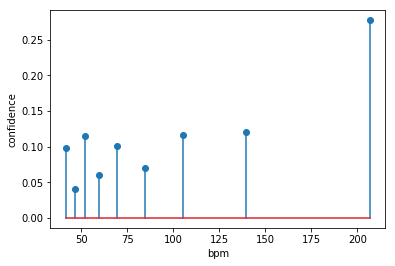

In [3]:
s.getMadmomTempo(do_plot=True)
plt.show()

The dominant tempo appears to be above 200bpm! 

We can also compute beat onset estimates using Madmom's state of the art recurrent neural network technique, and export these onsets as clicks to a file "onsets.mp3" which we can listen to

In [4]:
s.exportOnsetClicks("onsets.mp3", s.getMadmomOnsets())

Now we dig more deeply into to the meat of the analysis for this library, which is the audio novelty function.  First, we examine a simple audio novelty function I made

Text(0.5, 1.0, "Chris's MFCC Novelty Function")

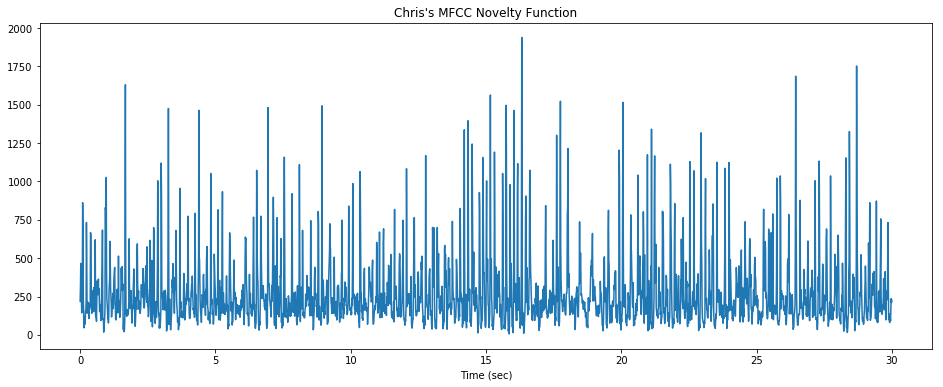

In [5]:
s.getMFCCNoveltyFn(winSize=2048, hopSize=512, pfmax=8000)
plt.figure(figsize=(16, 6))
plt.plot(np.arange(s.novFn.size)*s.hopSize/s.Fs, s.novFn)
plt.xlabel("Time (sec)")
plt.title("Chris's MFCC Novelty Function")

It does appear to have some peaks standing out in a regular rhytmic pattern, but it is messy.  There are other novelty functions that work better.  Let's try <a href = "https://madmom.readthedocs.io/en/latest/modules/features/onsets.html#madmom.features.onsets.superflux">superflux</a>, for example

Text(0.5, 1.0, 'Superflux Novelty Function')

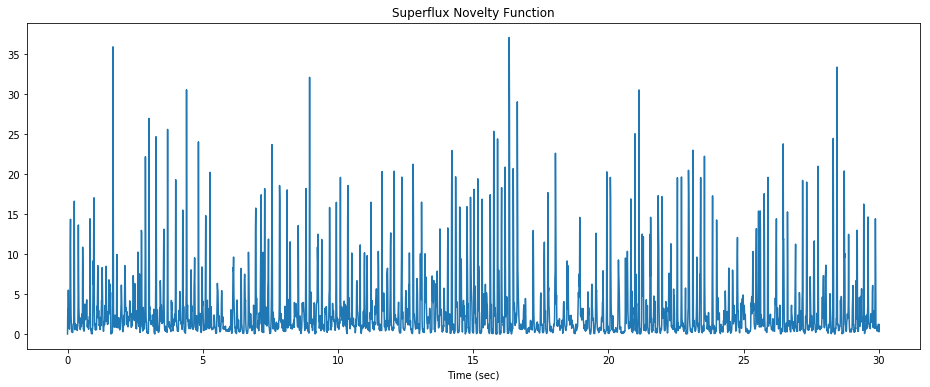

In [6]:
s.getSuperfluxNoveltyFn()
plt.figure(figsize=(16, 6))
plt.plot(np.arange(s.novFn.size)*s.hopSize/s.Fs, s.novFn)
plt.xlabel("Time (sec)")
plt.title("Superflux Novelty Function")

This has very similar patterns to the above novelty function, but it has slightly less noise.  Let's try an even fancier recurrent neural net technique

Text(0.5, 1.0, 'RNN Novelty Function')

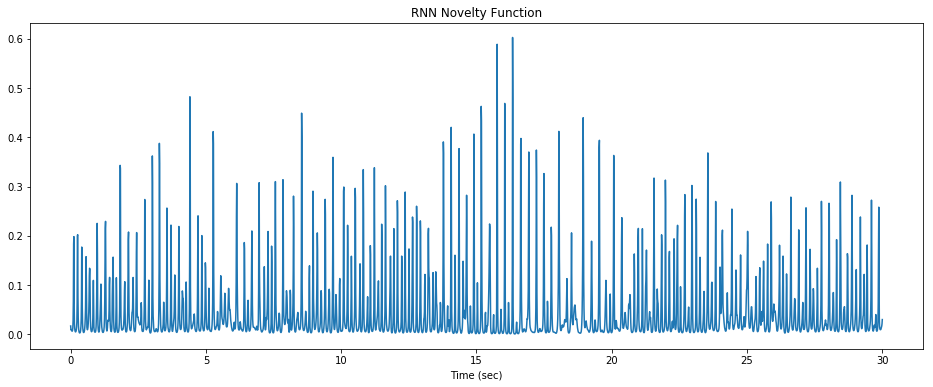

In [7]:
s.getRNNNoveltyFn()
plt.figure(figsize=(16, 6))
plt.plot(np.arange(s.novFn.size)*s.hopSize/s.Fs, s.novFn)
plt.xlabel("Time (sec)")
plt.title("RNN Novelty Function")

This is the cleanest one we've seen yet!  If we want to listen to the audio synchronized to this function to get a better idea what it picks up on, we can export it to a JSON file, which we can open in the HTML audio novelty function viewer "AudioNoveltyViewer.html" 

In [8]:
s.exportNovFnToViewer("onsets.json")